In [1]:
import sys
sys.path.insert(0, 'C:/Users/Can/Dropbox/PC (2)/Desktop/My Numerical Calculations/Single Particle/Hofstadter')
#from Hofstadter_Matrix_in_k_space import *
from Periodic_BC_Hofstadter_Hamiltonian_Matrix import *

lx= 40 , ly= 40


In [2]:
import matplotlib.pyplot as plt

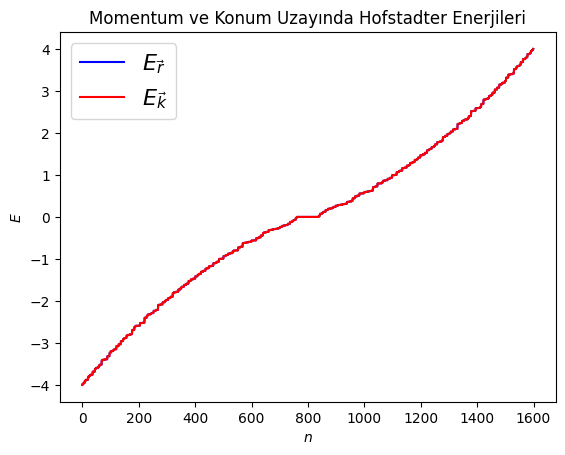

In [3]:
##################################
# I. KARŞILAŞTIRMA (B=0)
##################################

# No magnetic field 
def PerHMat_No_B():
    H = np.zeros((L_x*L_y, L_x*L_y), dtype=complex)
    for m in range(L_x*L_y):
        for n in range(L_x*L_y):
            if m in PerBCLat[n]:
                H[m][n] = -1
    return H

wR,uR=np.linalg.eig(PerHMat_No_B())
E_real=np.sort(np.real(wR))

# kare matris için izinli k değerleri (manyetik alan yok)
kx=ky=np.array([])
for m1 in range(L_x):
    kx=np.append(kx,[-np.pi+(2*np.pi*m1)/L_x])
for m2 in range(L_y):
    ky=np.append(ky,[-np.pi+(2*np.pi*m2)/L_y])
# L_x*L_y tane (kx,ky) çifti var
E=np.array([])
for i in kx:
    for j in ky:
        E=np.append(E,[2*(np.cos(i)+np.cos(j))],axis=0)
E_momentum=np.sort(E)

fig, ax = plt.subplots()
plt.plot(E_real, 'b-', label=r"$E_\vec{r}$")
plt.plot(E_momentum, 'r-', label=r"$E_\vec{k}$")
plt.title("Momentum ve Konum Uzayında Hofstadter Enerjileri")
ax.set_xlabel(r"$n$")
ax.set_ylabel(r"$E$")
plt.legend(prop={'size': 16})
plt.show()

C:\Users\Can\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


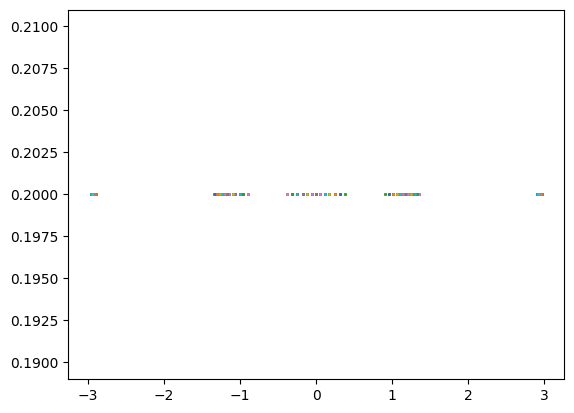

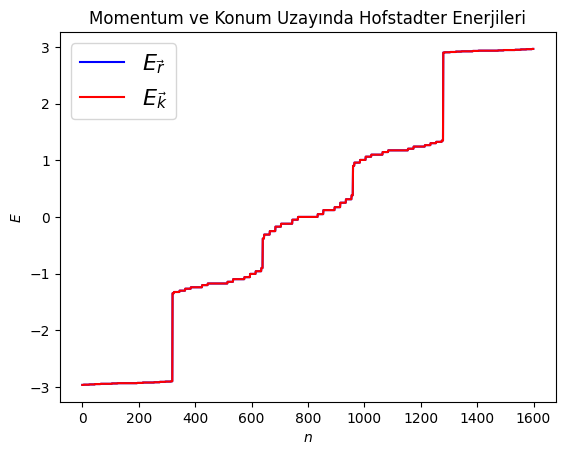

In [4]:
##################################
# II. KARŞILAŞTIRMA
##################################

q=5 #q değeri, ly'nin tam böleni olmak zorunda!
#Hofstadter için izinli k değerleri (manyetik alan var)
kx=ky=np.array([])
for m1 in range(L_x):
    kx=np.append(kx,[-np.pi+(2*np.pi*m1)/L_x]) #boyutu L_x kadar
for m2 in range(int(L_y/q)):
    ky=np.append(ky,[-np.pi/q+(2*np.pi*m2)/L_y]) #boyutu L_y/q kadar
# L_x*L_y/q tane (kx,ky) çifti var

#!! 
# Hofstadter_Matrix_in_k_space içindeki kodları buraya alınca sorunsuz çalışırken, kodları  başka yerden çağırdığımda hata veriyor. 
def HMatrix(alfa, k_x, k_y):
    M = np.zeros((q,q), dtype=complex) 
    for i in range (0, q):
        M[i,i]=2*np.cos(k_y-2*np.pi*alfa*i) 
        if i==q-1: 
            M[i,i-1]=1
        elif i==0: 
            M[i,i+1]=1
        else: 
            M[i,i-1]=1
            M[i,i+1]=1
        M[0,q-1]=np.exp(-q*1.j*k_x)
        M[q-1,0]=np.exp(q*1.j*k_x)
    return M
#!!

#izinli k değerlerinin enerjileri: (L_x*L_y/q)*q adet öz-değerim var.
E=np.array([])
for i in kx:
    for j in ky:
        wM,uM=np.linalg.eig(HMatrix(1/q, i, j))
        E=np.append(E,wM,axis=0)
E_momentum=np.sort(E)
#izinli k değerleri için bant ayrışımları gözlenir
y = np.zeros(q)
y[:] = 1/q
for i in kx:
    for j in ky:
        x = np.linalg.eigvalsh(HMatrix(1/q, i, j))
        plt.plot(x, y, 'o', markersize=1)

#konum uzayı hofstadter matrisi enerjileri
wR,uR=np.linalg.eig(PerHMat(1/q))
E_real=np.sort(np.real(wR))

fig, ax = plt.subplots()
plt.plot(E_real, 'b-', label=r"$E_\vec{r}$")
plt.plot(E_momentum, 'r-', label=r"$E_\vec{k}$")
plt.title("Momentum ve Konum Uzayında Hofstadter Enerjileri")
ax.set_xlabel(r"$n$")
ax.set_ylabel(r"$E$")
plt.legend(prop={'size': 16})
plt.show()